In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [10]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [11]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [13]:
df.drop(['X', 'Y', 'INTKEY', "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING"], axis=1, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   OBJECTID        194673 non-null  int64 
 2   INCKEY          194673 non-null  int64 
 3   COLDETKEY       194673 non-null  int64 
 4   REPORTNO        194673 non-null  object
 5   STATUS          194673 non-null  object
 6   ADDRTYPE        192747 non-null  object
 7   LOCATION        191996 non-null  object
 8   SEVERITYCODE.1  194673 non-null  int64 
 9   SEVERITYDESC    194673 non-null  object
 10  COLLISIONTYPE   189769 non-null  object
 11  PERSONCOUNT     194673 non-null  int64 
 12  PEDCOUNT        194673 non-null  int64 
 13  PEDCYLCOUNT     194673 non-null  int64 
 14  VEHCOUNT        194673 non-null  int64 
 15  INCDATE         194673 non-null  object
 16  INCDTTM         194673 non-null  object
 17  JUNCTIONTYPE    188344 non-nu

In [15]:
df.drop(['OBJECTID', 'INCKEY','COLDETKEY','REPORTNO', 'STATUS', 'LOCATION', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   ADDRTYPE        192747 non-null  object
 2   SEVERITYCODE.1  194673 non-null  int64 
 3   SEVERITYDESC    194673 non-null  object
 4   COLLISIONTYPE   189769 non-null  object
 5   JUNCTIONTYPE    188344 non-null  object
 6   WEATHER         189592 non-null  object
 7   ROADCOND        189661 non-null  object
 8   LIGHTCOND       189503 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [42]:
x = df['LIGHTCOND'].value_counts().to_frame()

In [43]:
y = df['WEATHER'].value_counts().to_frame()

In [44]:
z = df['ROADCOND'].value_counts().to_frame()

In [20]:
df.filter(['SEVERITYCODE', 'ROADCOND', 'WEATHERCOND', 'LIGHTCOND'])

,SEVERITYCODE,ROADCOND,LIGHTCOND
0,2,Wet,Daylight
1,1,Wet,Dark - Street Lights On
2,1,Dry,Daylight
3,1,Dry,Daylight
4,2,Wet,Daylight
...,...,...,...
194668,2,Dry,Daylight
194669,1,Wet,Daylight
194670,2,Dry,Daylight
194671,2,Dry,Dusk


In [34]:
a = df.groupby(['SEVERITYCODE','WEATHER']).size()
a

SEVERITYCODE  WEATHER                 
1             Blowing Sand/Dirt              41
              Clear                       75295
              Fog/Smog/Smoke                382
              Other                         716
              Overcast                    18969
              Partly Cloudy                   2
              Raining                     21969
              Severe Crosswind               18
              Sleet/Hail/Freezing Rain       85
              Snowing                       736
              Unknown                     14275
2             Blowing Sand/Dirt              15
              Clear                       35840
              Fog/Smog/Smoke                187
              Other                         116
              Overcast                     8745
              Partly Cloudy                   3
              Raining                     11176
              Severe Crosswind                7
              Sleet/Hail/Freezing Rain       28
 

In [35]:
b = df.groupby(['SEVERITYCODE','ROADCOND']).size()
b

SEVERITYCODE  ROADCOND      
1             Dry               84446
              Ice                 936
              Oil                  40
              Other                89
              Sand/Mud/Dirt        52
              Snow/Slush          837
              Standing Water       85
              Unknown           14329
              Wet               31719
2             Dry               40064
              Ice                 273
              Oil                  24
              Other                43
              Sand/Mud/Dirt        23
              Snow/Slush          167
              Standing Water       30
              Unknown             749
              Wet               15755
dtype: int64

In [36]:
c = df.groupby(['SEVERITYCODE','LIGHTCOND']).size()
c

SEVERITYCODE  LIGHTCOND               
1             Dark - No Street Lights      1203
              Dark - Street Lights Off      883
              Dark - Street Lights On     34032
              Dark - Unknown Lighting         7
              Dawn                         1678
              Daylight                    77593
              Dusk                         3958
              Other                         183
              Unknown                     12868
2             Dark - No Street Lights       334
              Dark - Street Lights Off      316
              Dark - Street Lights On     14475
              Dark - Unknown Lighting         4
              Dawn                          824
              Daylight                    38544
              Dusk                         1944
              Other                          52
              Unknown                       605
dtype: int64

<AxesSubplot:>

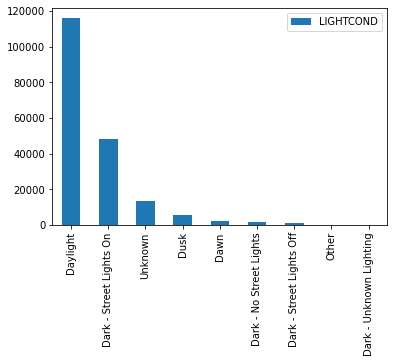

In [46]:
x.plot(kind = 'bar')

<AxesSubplot:>

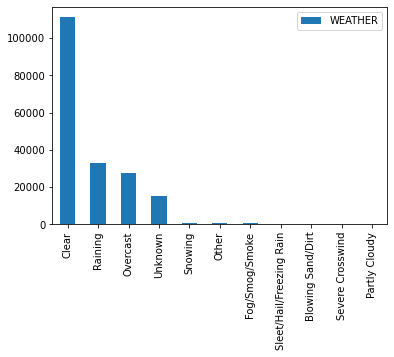

In [48]:
y.plot(kind = 'bar')

<AxesSubplot:>

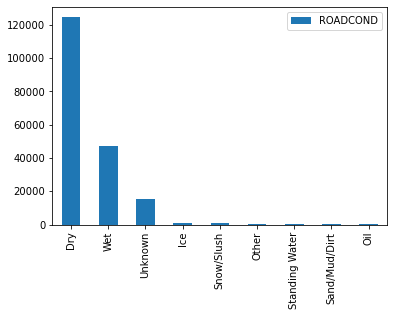

In [49]:
z.plot(kind = 'bar')